**Load the Titanic Dataset**

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset manually
titanic = pd.read_csv('/content/tested.csv')

# Display the first few rows of the dataset
print(titanic.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


**Data Cleaning**

**Check for missing values**

In [ ]:
# Check for missing values
print(titanic.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Fill missing values for 'age' with the median age**

In [ ]:
# Fill missing values for 'age' with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill missing values for 'embarked' with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop the 'deck' column due to many missing values
titanic.drop(columns=['Cabin'], inplace=True)

# Fill missing values for 'embark_town' with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop rows with any remaining missing values
titanic.dropna(inplace=True)

# Verify no missing values remain
print(titanic.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Exploratory Data Analysis (EDA)**

In [ ]:
# Summary statistics for numerical variables
print(titanic.describe())

# Summary statistics for categorical variables
print(titanic.describe(include=['O']))


       PassengerId    Survived      Pclass         Age       SibSp  \
count   417.000000  417.000000  417.000000  417.000000  417.000000   
mean   1100.635492    0.364508    2.263789   29.525180    0.448441   
std     120.923774    0.481870    0.842077   12.628258    0.897568   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.000000    0.000000    1.000000   23.000000    0.000000   
50%    1101.000000    0.000000    3.000000   27.000000    0.000000   
75%    1205.000000    1.000000    3.000000   35.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  417.000000  417.000000  
mean     0.393285   35.627188  
std      0.982419   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  
                    Name   Sex    Ticket Embarked
count                417   417 

**Gender distribution**

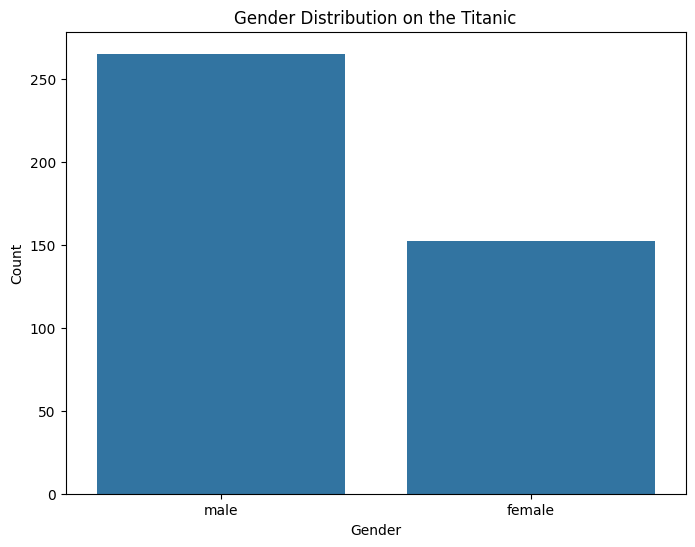

In [ ]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='Sex')
plt.title('Gender Distribution on the Titanic')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Class distribution**

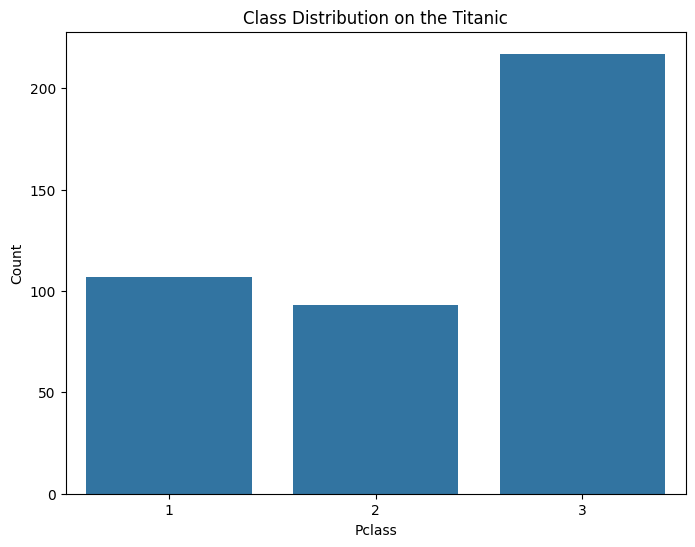

In [ ]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='Pclass')
plt.title('Class Distribution on the Titanic')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


**Age distribution**

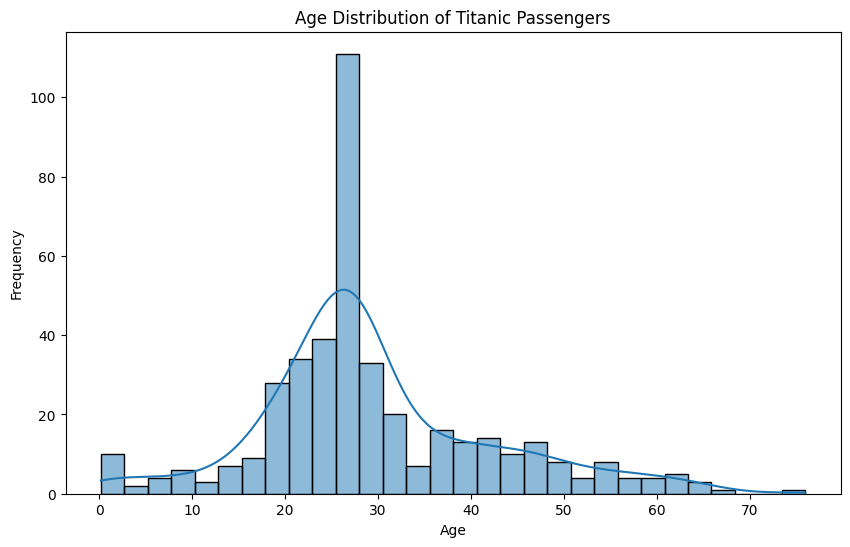

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Fare distribution**

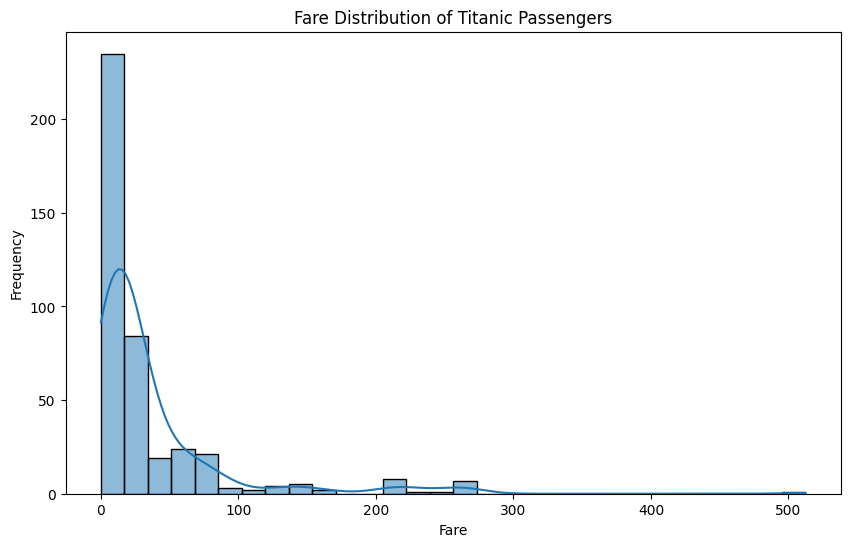

In [ ]:
# Fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


**Survival rate by gender**

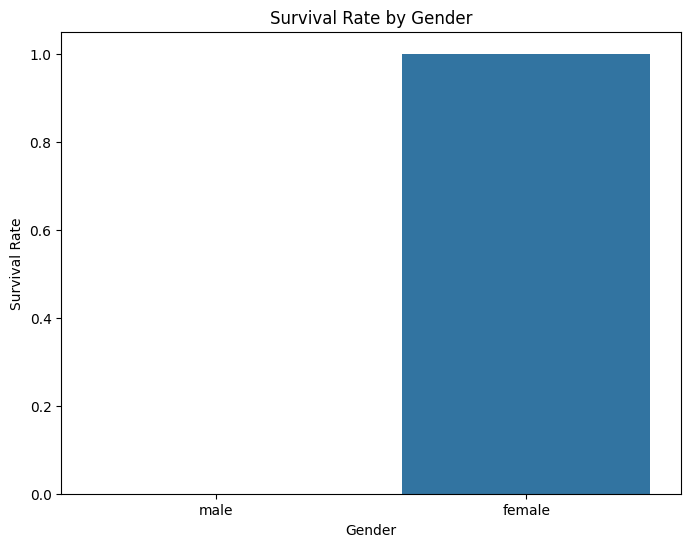

In [ ]:
# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=titanic, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


**Survival rate by class**

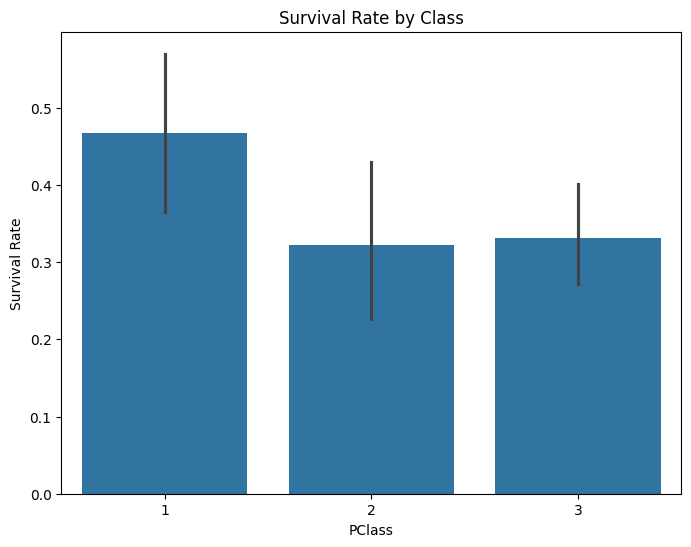

In [ ]:
# Survival rate by class
plt.figure(figsize=(8, 6))
sns.barplot(data=titanic, x='Pclass', y='Survived')
plt.title('Survival Rate by Class')
plt.xlabel('PClass')
plt.ylabel('Survival Rate')
plt.show()


**Age vs. survival**

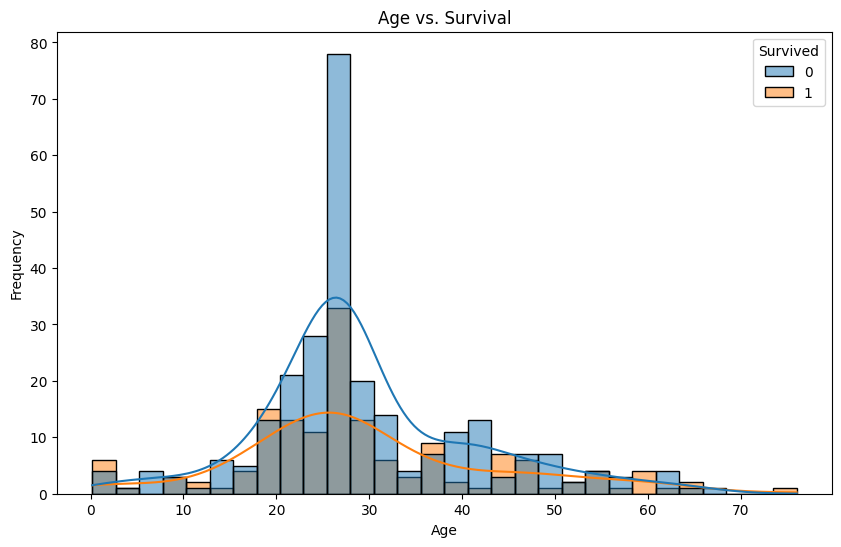

In [ ]:
# Age vs. survival
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age vs. Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Fare vs. survival**

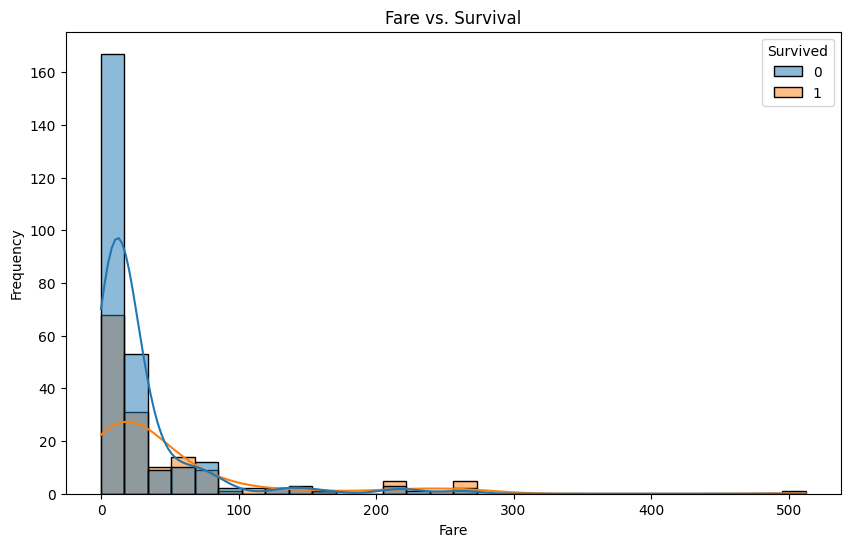

In [ ]:
# Fare vs. survival
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Fare', hue='Survived', bins=30, kde=True)
plt.title('Fare vs. Survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()
